In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease/heart.csv')

In [3]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
x = df.drop('target', axis=1)
y = df['target']

In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Train Test Split


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_test.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3


In [10]:
y_test.sample()

193    0
Name: target, dtype: int64

# Standardization
not needed for XGboost

In [11]:
ss = StandardScaler()

In [12]:
x_train_trans = ss.fit_transform(x_train)
x_test_trans = ss.transform(x_test)

In [13]:
x_train_trans

array([[-1.35679832,  0.72250438,  0.00809909, ...,  0.95390513,
        -0.68970073, -0.50904773],
       [ 0.38508599,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [-0.92132724,  0.72250438,  0.98808912, ..., -0.69498803,
        -0.68970073, -0.50904773],
       ...,
       [ 1.58263146,  0.72250438,  1.96807914, ..., -0.69498803,
         0.32186034, -0.50904773],
       [-0.92132724,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [ 0.92942484, -1.38407465,  0.00809909, ...,  0.95390513,
         1.33342142, -0.50904773]])

# PCA for Data visulization

In [14]:
pca = PCA(n_components=2)

In [15]:
x_train_pca = pca.fit_transform(x_train)

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Second Principal Component')

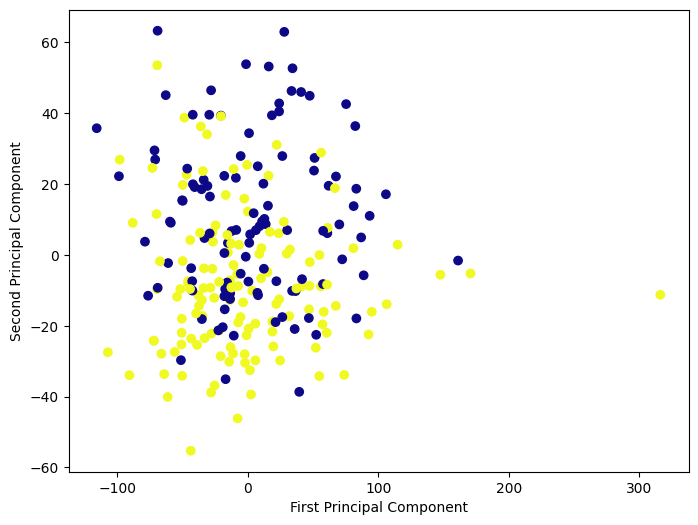

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Prediction using KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(x_test)

In [21]:
accuracy_score(y_pred,y_test)

0.6885245901639344

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


# XGBoost

In [23]:
import xgboost as xgb

In [24]:
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8, 
    random_state=42
)

model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [25]:
y_pred2 = model.predict(x_test)

In [26]:
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

# Accuracy score for XGBoost

In [27]:
print(accuracy_score(y_pred2,y_test))

0.8524590163934426


# Feature Importance

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

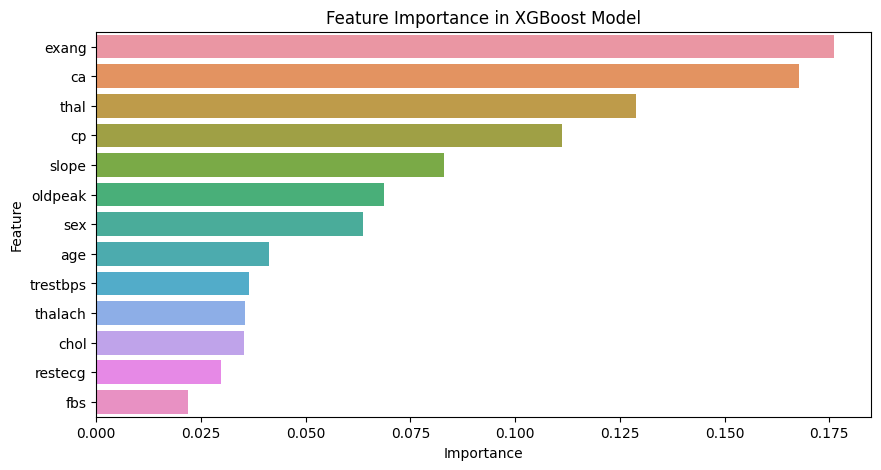

In [29]:
feature_importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance in XGBoost Model")
plt.show()

# Creating Model

In [30]:
import pickle

with open("XGBoost_model.pkl", "wb") as file:
    pickle.dump(model, file)

model.save_model("updated_model.json")
